#### 文本预处理步骤
+ 将文本作为字符串加载到内存
+ 将字符串拆分成单词和字符
+ 建立一个词表，将拆分的词元映射到数字索引
+ 将模型转化为数字索引序列，方便模型操作

In [1]:
import collections
import re 
from d2l import torch as d2l

In [5]:
#读取数据集
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt',
    '090b5e7e70c295757f55df93cb0a180b9691891a')

def read_time_machine():
    with open(d2l.download('time_machine'),'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+',' ',line).strip().lower() for line in lines]
lines = read_time_machine()
print(f'#文本总行数：{len(lines)}')
print(lines[0])
print(lines[10])

#文本总行数：3221
the time machine by h g wells
twinkled and his usually pale face was flushed and animated the


In [8]:
#词元化
def tokenize(lines,token):
    if token=='word':
        return [line.split() for line in lines]
    elif token=='char':
        return [list(line) for line in lines]
    else:
        print('error:unk '+token)
tokens=tokenize(lines,'word')
for i in range(11):
    print(tokens[i])

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
[]
[]
[]
['i']
[]
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him']
['was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and']
['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']


In [9]:
tokens_c = tokenize(lines,'char')
for i in range(11):
    print(tokens_c[i])

['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'b', 'y', ' ', 'h', ' ', 'g', ' ', 'w', 'e', 'l', 'l', 's']
[]
[]
[]
[]
['i']
[]
[]
['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 't', 'r', 'a', 'v', 'e', 'l', 'l', 'e', 'r', ' ', 'f', 'o', 'r', ' ', 's', 'o', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'c', 'o', 'n', 'v', 'e', 'n', 'i', 'e', 'n', 't', ' ', 't', 'o', ' ', 's', 'p', 'e', 'a', 'k', ' ', 'o', 'f', ' ', 'h', 'i', 'm']
['w', 'a', 's', ' ', 'e', 'x', 'p', 'o', 'u', 'n', 'd', 'i', 'n', 'g', ' ', 'a', ' ', 'r', 'e', 'c', 'o', 'n', 'd', 'i', 't', 'e', ' ', 'm', 'a', 't', 't', 'e', 'r', ' ', 't', 'o', ' ', 'u', 's', ' ', 'h', 'i', 's', ' ', 'g', 'r', 'e', 'y', ' ', 'e', 'y', 'e', 's', ' ', 's', 'h', 'o', 'n', 'e', ' ', 'a', 'n', 'd']
['t', 'w', 'i', 'n', 'k', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'u', 's', 'u', 'a', 'l', 'l', 'y', ' ', 'p', 'a', 'l', 'e', ' ', 'f', 'a', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'f

In [17]:
#词表（目的是索引）
vocab = d2l.Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])
len(vocab.token_to_idx.items())

[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]


4580

In [25]:
#词表（目的是索引）
vocab_c = d2l.Vocab(tokens_c)
list(vocab_c.token_to_idx.items())[:10]
vocab_c['e']

2

In [26]:
for i in [0,10]:
    print('文本： ',tokens[i])
    print('索引： ',vocab[tokens[i]])
    

文本：  ['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
索引：  [1, 19, 50, 40, 3130, 3058, 438]
文本：  ['twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the']
索引：  [4399, 3, 25, 1398, 387, 113, 7, 1676, 3, 1053, 1]


In [30]:
for i in [0,10]:
    print('字符： ',tokens_c[i])
    print('索引： ',vocab_c[tokens_c[i]])
    print('-------------------------------------------------------------')

字符：  ['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'b', 'y', ' ', 'h', ' ', 'g', ' ', 'w', 'e', 'l', 'l', 's']
索引：  [3, 9, 2, 1, 3, 5, 13, 2, 1, 13, 4, 15, 9, 5, 6, 2, 1, 21, 19, 1, 9, 1, 18, 1, 17, 2, 12, 12, 8]
-------------------------------------------------------------
字符：  ['t', 'w', 'i', 'n', 'k', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'u', 's', 'u', 'a', 'l', 'l', 'y', ' ', 'p', 'a', 'l', 'e', ' ', 'f', 'a', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'f', 'l', 'u', 's', 'h', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'a', 'n', 'i', 'm', 'a', 't', 'e', 'd', ' ', 't', 'h', 'e']
索引：  [3, 17, 5, 6, 23, 12, 2, 11, 1, 4, 6, 11, 1, 9, 5, 8, 1, 14, 8, 14, 4, 12, 12, 19, 1, 20, 4, 12, 2, 1, 16, 4, 15, 2, 1, 17, 4, 8, 1, 16, 12, 14, 8, 9, 2, 11, 1, 4, 6, 11, 1, 4, 6, 5, 13, 4, 3, 2, 11, 1, 3, 9, 2]
-------------------------------------------------------------


In [46]:
#整合所有功能：将所有功能打包到load_corpus_time_machine函数中，该函数返回corpus（词元索
#引列表）和vocab（时光机器语料库的词表）。
corpus,vocab = d2l.load_corpus_time_machine()
corpus

[3,
 9,
 2,
 1,
 3,
 5,
 13,
 2,
 1,
 13,
 4,
 15,
 9,
 5,
 6,
 2,
 1,
 21,
 19,
 1,
 9,
 1,
 18,
 1,
 17,
 2,
 12,
 12,
 8,
 5,
 3,
 9,
 2,
 1,
 3,
 5,
 13,
 2,
 1,
 3,
 10,
 4,
 22,
 2,
 12,
 12,
 2,
 10,
 1,
 16,
 7,
 10,
 1,
 8,
 7,
 1,
 5,
 3,
 1,
 17,
 5,
 12,
 12,
 1,
 21,
 2,
 1,
 15,
 7,
 6,
 22,
 2,
 6,
 5,
 2,
 6,
 3,
 1,
 3,
 7,
 1,
 8,
 20,
 2,
 4,
 23,
 1,
 7,
 16,
 1,
 9,
 5,
 13,
 17,
 4,
 8,
 1,
 2,
 24,
 20,
 7,
 14,
 6,
 11,
 5,
 6,
 18,
 1,
 4,
 1,
 10,
 2,
 15,
 7,
 6,
 11,
 5,
 3,
 2,
 1,
 13,
 4,
 3,
 3,
 2,
 10,
 1,
 3,
 7,
 1,
 14,
 8,
 1,
 9,
 5,
 8,
 1,
 18,
 10,
 2,
 19,
 1,
 2,
 19,
 2,
 8,
 1,
 8,
 9,
 7,
 6,
 2,
 1,
 4,
 6,
 11,
 3,
 17,
 5,
 6,
 23,
 12,
 2,
 11,
 1,
 4,
 6,
 11,
 1,
 9,
 5,
 8,
 1,
 14,
 8,
 14,
 4,
 12,
 12,
 19,
 1,
 20,
 4,
 12,
 2,
 1,
 16,
 4,
 15,
 2,
 1,
 17,
 4,
 8,
 1,
 16,
 12,
 14,
 8,
 9,
 2,
 11,
 1,
 4,
 6,
 11,
 1,
 4,
 6,
 5,
 13,
 4,
 3,
 2,
 11,
 1,
 3,
 9,
 2,
 16,
 5,
 10,
 2,
 1,
 21,
 14,
 10,
 6,
 2,
 11,
 1,
 21,

In [47]:
import random 
import torch 
from d2l import torch as d2l 

In [66]:
tokens=d2l.tokenize(d2l.read_time_machine())
corpus=[token for line in tokens for token in line]
vocab = d2l.Vocab(corpus)
# list(vocab.token_to_idx.items())
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

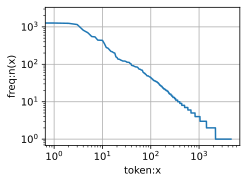

In [68]:
freqs = [freq for token,freq in vocab.token_freqs]
d2l.plot(freqs,xlabel='token:x',ylabel='freq:n(x)',
        xscale='log',yscale='log')

In [79]:
def seq_data_iter_random(corpus,batch_size,num_steps):
    corpus = corpus[random.randint(0,num_steps-1):]
    num_subseqs=(len(corpus)-1)//num_steps
    initial_indices=list(range(0,num_subseqs*num_steps,num_steps))
    random.shuffle(initial_indices)
    
    def data(pos):
        return corpus[pos:pos+num_steps]
    num_batches=num_subseqs//batch_size
    for i in range(0,batch_size*num_batches,batch_size):
        initial_indices_per_batch=initial_indices[i:i+batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j+1) for j in initial_indices_per_batch]
        yield torch.tensor(X),torch.tensor(Y)
    

In [80]:
my_seq = list(range(35))
for X,Y in seq_data_iter_random(my_seq,batch_size=2,num_steps=5):
    print('X: ',X,'\nY: ',Y)

X:  tensor([[20, 21, 22, 23, 24],
        [ 0,  1,  2,  3,  4]]) 
Y:  tensor([[21, 22, 23, 24, 25],
        [ 1,  2,  3,  4,  5]])
X:  tensor([[25, 26, 27, 28, 29],
        [15, 16, 17, 18, 19]]) 
Y:  tensor([[26, 27, 28, 29, 30],
        [16, 17, 18, 19, 20]])
X:  tensor([[10, 11, 12, 13, 14],
        [ 5,  6,  7,  8,  9]]) 
Y:  tensor([[11, 12, 13, 14, 15],
        [ 6,  7,  8,  9, 10]])
